This will go trough and check when or if the Arab Spring was included in the other country links

The countries we will include are 
* Tunisia
* Egypt
* Libya
* Yemen
* Syria
* Bahrain
* Algeria
* Iraq
* Jordan
* Morocco
* Oman


this will go through all of their outlinks and see when they inlcuded teh AS in their outlinks. this will leverage their data that we already pulled 
- in revid_data and just go and get the oulink data
- find the revid_id where Arab Spring is linked
- match that with the time. 
- follow it though time? 

In [1]:
import numpy as np
import pandas as pd

import json, requests

import networkx as nx
import os
import pickle

import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from datetime import date, timedelta
import dateutil.relativedelta

import matplotlib.dates as mdates

## Get the dates off all of the countries

In [2]:
countrylyst = ['Tunisia', 'Egypt', 'Libya', 'Yemen', 'Syria', 'Bahrain', 'Algeria',  'Iraq', 'Jordan', 'Morocco', 'Oman']
#'Djbouti', Palestine

In [5]:

countryTimes = {}
firstTimes = {}

for place in countrylyst:
    #get revid of outlinks with that time
    path = '../Data/revid_data/' + place + '/'

    #gets the outlink specific time:revid
    with open(path +'time_revid_m.pkl', 'rb') as pickleFile:
        time_revids = pickle.load(pickleFile)

    #gets the outlink specific revid:outlinks 
    with open(path +'revid_outlink_m.pkl', 'rb') as pickleFile:
         revid_outlinks = pickle.load(pickleFile)

            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == 'Arab Spring':
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    
    firstTimes[place] = inclusionTimes[0]
    countryTimes[place] = inclusionTimes

In [ ]:
# countryTimes

{'Tunisia': [Timestamp('2011-05-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-06-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-07-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-08-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-09-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-10-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-11-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-12-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-01-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-02-29 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-03-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-04-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-05-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-06-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-07-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-08-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('

In [7]:
firstTimes

{'Tunisia': Timestamp('2011-05-31 00:00:00+0000', tz='UTC', freq='M'),
 'Egypt': Timestamp('2015-11-30 00:00:00+0000', tz='UTC', freq='M'),
 'Libya': Timestamp('2013-03-31 00:00:00+0000', tz='UTC', freq='M'),
 'Yemen': Timestamp('2011-04-30 00:00:00+0000', tz='UTC', freq='M'),
 'Syria': Timestamp('2011-07-31 00:00:00+0000', tz='UTC', freq='M'),
 'Bahrain': Timestamp('2011-03-31 00:00:00+0000', tz='UTC'),
 'Algeria': Timestamp('2013-02-28 00:00:00+0000', tz='UTC'),
 'Iraq': Timestamp('2013-04-30 00:00:00+0000', tz='UTC', freq='M'),
 'Jordan': Timestamp('2012-09-30 00:00:00+0000', tz='UTC', freq='M'),
 'Morocco': Timestamp('2011-05-31 00:00:00+0000', tz='UTC', freq='M'),
 'Oman': Timestamp('2011-10-31 00:00:00+0000', tz='UTC', freq='M')}

## Visualize

In [8]:
#make a gaant chart
#try with tunisia

countryDF_final = pd.DataFrame(columns = ['country', 'start', 'end'])

for place in countrylyst:
    startTimes = []
    endTimes = []

    start = firstTimes[place]
    startTimes.append(start)
    
    first = countryTimes[place][0]
    final = countryTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in countryTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    countryDict = pd.DataFrame(columns = ['country', 'start', 'end'])
    
    
    countryDict['start'] = startTimes
    countryDict['end'] = endTimes
    countryDict['country'] = place
#     print(countryDict)
    
    countryDF_final = countryDF_final.append(countryDict)
    

<ipython-input-8-675f5878e173>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-8-675f5878e173>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-8-675f5878e173>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-8-675f5878e173>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-8-675f5878e173>:53: FutureWarning: The frame.append method is deprecated and will be remo

In [9]:
countryDF_final.reset_index(drop=True)

,country,start,end
0,Tunisia,2011-05-31 00:00:00+00:00,2017-03-31 00:00:00+00:00
1,Tunisia,2017-05-31 00:00:00+00:00,2023-10-31 00:00:00+00:00
2,Egypt,2015-11-30 00:00:00+00:00,2023-10-31 00:00:00+00:00
3,Libya,2013-03-31 00:00:00+00:00,2023-10-31 00:00:00+00:00
4,Yemen,2011-04-30 00:00:00+00:00,2022-08-31 00:00:00+00:00
5,Yemen,2022-10-31 00:00:00+00:00,2023-10-31 00:00:00+00:00
6,Syria,2011-07-31 00:00:00+00:00,2023-10-31 00:00:00+00:00
7,Bahrain,2011-03-31 00:00:00+00:00,2011-06-30 00:00:00+00:00
8,Bahrain,2012-08-31 00:00:00+00:00,2023-10-31 00:00:00+00:00
9,Algeria,2013-02-28 00:00:00+00:00,2016-02-29 00:00:00+00:00


TypeError: set_ticks() got an unexpected keyword argument 'labels'

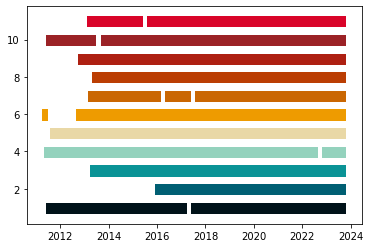

In [10]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]

#Tunisia
Tunsia = countryDF_final.loc[countryDF_final['country'] == 'Tunisia']
ax.broken_barh(xranges=[(Tunsia['start'][0], Tunsia['end'][0]-Tunsia['start'][0]),
                         (Tunsia['start'][1], Tunsia['end'][1]-Tunsia['start'][1])], yrange=(.65,0.6), facecolors = colorLyst[0])

#Egypt
Egypt = countryDF_final.loc[countryDF_final['country'] == 'Egypt']
ax.broken_barh(xranges= [(Egypt['start'][0], Egypt['end'][0]-Egypt['start'][0])],
                         yrange=(1.65,0.6), facecolors = colorLyst[1])

#Libya
Libya = countryDF_final.loc[countryDF_final['country'] == 'Libya']
ax.broken_barh(xranges= [(Libya['start'][0], Libya['end'][0]-Libya['start'][0])],
                         yrange=(2.65,0.6), facecolors = colorLyst[2])

#Yemen
Yemen = countryDF_final.loc[countryDF_final['country'] == 'Yemen']
ax.broken_barh(xranges=[(Yemen['start'][0], Yemen['end'][0]-Yemen['start'][0]),
                         (Yemen['start'][1], Yemen['end'][1]-Yemen['start'][1])],
               yrange=(3.65,0.6), 
               facecolors = colorLyst[3], label = 'Yemen' )


#Syria
Syria = countryDF_final.loc[countryDF_final['country'] == 'Syria']
ax.broken_barh(xranges= [(Syria['start'][0], Syria['end'][0]- Syria['start'][0])],
                         yrange=(4.65,0.6), facecolors = colorLyst[4])

#Bahrain
Bahrain = countryDF_final.loc[countryDF_final['country'] == 'Bahrain']
ax.broken_barh(xranges=[(Bahrain['start'][0], Bahrain['end'][0]-Bahrain['start'][0]),
                         (Bahrain['start'][1], Bahrain['end'][1]-Bahrain['start'][1])], 
               yrange=(5.65,0.6), facecolors = colorLyst[5])

#Algeria
Algeria = countryDF_final.loc[countryDF_final['country'] == 'Algeria']
ax.broken_barh(xranges=[(Algeria['start'][0], Algeria['end'][0]-Algeria['start'][0]),
                        (Algeria['start'][1], Algeria['end'][1]-Algeria['start'][1]),
                       (Algeria['start'][2], Algeria['end'][2]-Algeria['start'][2])], 
               yrange=(6.65,0.6), facecolors = colorLyst[6])

#Iraq
Iraq = countryDF_final.loc[countryDF_final['country'] == 'Iraq']
ax.broken_barh(xranges= [(Iraq['start'][0], Iraq['end'][0]-Iraq['start'][0])],
                         yrange=(7.65,0.6), facecolors = colorLyst[7])

#Jordan
Jordan = countryDF_final.loc[countryDF_final['country'] == 'Jordan']
ax.broken_barh(xranges= [(Jordan['start'][0], Jordan['end'][0]-Jordan['start'][0])],
                         yrange=(8.65,0.6), facecolors = colorLyst[8])

#Libya
Morocco = countryDF_final.loc[countryDF_final['country'] == 'Morocco']
ax.broken_barh(xranges=[(Morocco['start'][0], Morocco['end'][0]-Morocco['start'][0]),
                         (Morocco['start'][1], Morocco['end'][1]-Morocco['start'][1])],
               yrange=(9.65,0.6), facecolors = colorLyst[9])

Oman = countryDF_final.loc[countryDF_final['country'] == 'Oman']
ax.broken_barh(xranges=[(Oman['start'][0], Oman['end'][0]-Oman['start'][0]),
                        (Oman['start'][1], Oman['end'][1]-Oman['start'][1]),
                       (Oman['start'][2], Oman['end'][2]-Oman['start'][2])],
               yrange=(10.65,0.6), facecolors = colorLyst[10])


ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11], labels=countrylyst)
ax.set_title('When Country Wikipedia Pages Include the Arab Spring- English')



xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])
# ax.legend(labels=countrylyst,fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("00_Visuals/PNG/02L_countryInclusionofAS.png")

plt.show()

# Events

do the same thing but with major events - for these countries
this needs to be done a bit more carefully though because there are also one's linked in the arabic arab spring page, and we want these to be links in the english page that have the euqivalent referenced in the arabic one

* Tunisia:
    - Tunisian Revolution (ILL for arabic)
* Egypt:
    - 2011 Egyptian revolution (ILL for arabic)
* Libya: 
    - Libyan civil war (2011) (ILL for arabic)
* Yemen:
    - Yemeni Revolution (ILL for arabic)
* Syria:
    - Syrian revolution (the arabic page only links to the 'syrian civil war' page this one only links to 'syrian revolution'
* Bahrain: 
    - 2011 Bahraini uprising (ILL for arabic)

these were linked in the english one but way down at the bottom and away from everythin
* Algeria:
    - 2010–2012 Algerian protests (ILL for arabic)-- but not referenced until the very bottom
* Iraq:
    - 2011 Iraqi protests (ILL for arabic)-- but not referenced until the very bottom
* Jordan:
    - 2011–2012 Jordanian protests (ILL for arabic)-- but not referenced until the very bottom
* Morocco:
    - 2011–2012 Moroccan protests (ILL for arabic)-- but not referenced until the very bottom
* Oman:
    - 2011 Omani protests (ILL for arabic)-- but not referenced until the very bottom

In [5]:
eventsLyst = ['Tunisian Revolution', '2011 Egyptian revolution', 'Libyan civil war (2011)',  'Yemeni Revolution', 'Syrian revolution', '2011 Bahraini uprising', '2010–2012 Algerian protests', '2011 Iraqi protests', '2011–2012 Jordanian protests', '2011–2012 Moroccan protests', '2011 Omani protests' ]

In [6]:
root = os.getcwd()
eventTimes = {}
firstTimes_event = {}

for moment in eventsLyst:
    #get revid of outlinks with that time
    path = str(root)+ '/revid_data/' + moment + '/'

    #gets the outlink specific time:revid
    with open(path +'time_revid_m.pkl', 'rb') as pickleFile:
        time_revids = pickle.load(pickleFile)

    #gets the outlink specific revid:outlinks 
    with open(path +'revid_outlink_m.pkl', 'rb') as pickleFile:
         revid_outlinks = pickle.load(pickleFile)

            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == 'Arab Spring':
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    
    firstTimes_event[moment] = inclusionTimes[0]
    eventTimes[moment] = inclusionTimes

In [7]:
firstTimes_event

{'Tunisian Revolution': Timestamp('2011-02-28 00:00:00+0000', tz='UTC', freq='M'),
 '2011 Egyptian revolution': Timestamp('2011-02-28 00:00:00+0000', tz='UTC'),
 'Libyan civil war (2011)': Timestamp('2011-01-31 00:00:00+0000', tz='UTC', freq='M'),
 'Yemeni Revolution': Timestamp('2011-02-28 00:00:00+0000', tz='UTC', freq='M'),
 'Syrian revolution': Timestamp('2013-06-30 00:00:00+0000', tz='UTC', freq='M'),
 '2011 Bahraini uprising': Timestamp('2011-02-28 00:00:00+0000', tz='UTC'),
 '2010–2012 Algerian protests': Timestamp('2011-03-31 00:00:00+0000', tz='UTC'),
 '2011 Iraqi protests': Timestamp('2011-03-31 00:00:00+0000', tz='UTC'),
 '2011–2012 Jordanian protests': Timestamp('2011-03-31 00:00:00+0000', tz='UTC'),
 '2011–2012 Moroccan protests': Timestamp('2011-02-28 00:00:00+0000', tz='UTC'),
 '2011 Omani protests': Timestamp('2011-03-31 00:00:00+0000', tz='UTC')}

In [8]:
eventTimes

{'Tunisian Revolution': [Timestamp('2011-02-28 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-03-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-04-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-05-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-06-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-07-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-08-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-09-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-10-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-11-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2011-12-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-01-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-02-29 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-03-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-04-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2012-05-31 00:00:00+0000', tz='UTC', freq='M'),
 

## Visualize the events page including Arab Spring

In [9]:
#make a gaant chart
#try with tunisia

eventDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in eventTimes.keys():
    startTimes = []
    endTimes = []

    start = firstTimes_event[place]
    startTimes.append(start)
    
    first = eventTimes[place][0]
    final = eventTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in eventTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    countryDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    countryDict['start'] = startTimes
    countryDict['end'] = endTimes
    countryDict['event'] = place
    print(countryDict)
    
    eventDF_final = pd.concat([eventDF_final,countryDict])
    

                  event                     start                       end
0   Tunisian Revolution 2011-02-28 00:00:00+00:00 2013-06-30 00:00:00+00:00
1   Tunisian Revolution 2013-08-31 00:00:00+00:00 2014-02-28 00:00:00+00:00
2   Tunisian Revolution 2014-04-30 00:00:00+00:00 2014-09-30 00:00:00+00:00
3   Tunisian Revolution 2014-11-30 00:00:00+00:00 2015-03-31 00:00:00+00:00
4   Tunisian Revolution 2015-05-31 00:00:00+00:00 2015-06-30 00:00:00+00:00
5   Tunisian Revolution 2015-08-31 00:00:00+00:00 2015-11-30 00:00:00+00:00
6   Tunisian Revolution 2016-01-31 00:00:00+00:00 2016-03-31 00:00:00+00:00
7   Tunisian Revolution 2016-05-31 00:00:00+00:00 2017-12-31 00:00:00+00:00
8   Tunisian Revolution 2018-03-31 00:00:00+00:00 2018-07-31 00:00:00+00:00
9   Tunisian Revolution 2018-09-30 00:00:00+00:00 2019-02-28 00:00:00+00:00
10  Tunisian Revolution 2019-04-30 00:00:00+00:00 2020-02-29 00:00:00+00:00
11  Tunisian Revolution 2020-04-30 00:00:00+00:00 2020-07-31 00:00:00+00:00
12  Tunisian

In [10]:
eventDF_final

,event,start,end
0,Tunisian Revolution,2011-02-28 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,Tunisian Revolution,2013-08-31 00:00:00+00:00,2014-02-28 00:00:00+00:00
2,Tunisian Revolution,2014-04-30 00:00:00+00:00,2014-09-30 00:00:00+00:00
3,Tunisian Revolution,2014-11-30 00:00:00+00:00,2015-03-31 00:00:00+00:00
4,Tunisian Revolution,2015-05-31 00:00:00+00:00,2015-06-30 00:00:00+00:00
...,...,...,...
22,2011 Omani protests,2022-11-30 00:00:00+00:00,2022-11-30 00:00:00+00:00
23,2011 Omani protests,2023-02-28 00:00:00+00:00,2023-02-28 00:00:00+00:00
24,2011 Omani protests,2023-04-30 00:00:00+00:00,2023-04-30 00:00:00+00:00
25,2011 Omani protests,2023-06-30 00:00:00+00:00,2023-06-30 00:00:00+00:00


eventsLyst = ['Tunisian Revolution', '2011 Egyptian revolution', 'Libyan civil war (2011)',  'Yemeni Revolution', 'Syrian revolution', '2011 Bahraini uprising', '2010–2012 Algerian protests', '2011 Iraqi protests', '2011–2012 Jordanian protests', '2011–2012 Moroccan protests', '2011 Omani protests' ]

In [11]:
TunisianRevolution = eventDF_final.loc[eventDF_final['event'] == 'Tunisian Revolution']
TunisianRevolution

,event,start,end
0,Tunisian Revolution,2011-02-28 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,Tunisian Revolution,2013-08-31 00:00:00+00:00,2014-02-28 00:00:00+00:00
2,Tunisian Revolution,2014-04-30 00:00:00+00:00,2014-09-30 00:00:00+00:00
3,Tunisian Revolution,2014-11-30 00:00:00+00:00,2015-03-31 00:00:00+00:00
4,Tunisian Revolution,2015-05-31 00:00:00+00:00,2015-06-30 00:00:00+00:00
5,Tunisian Revolution,2015-08-31 00:00:00+00:00,2015-11-30 00:00:00+00:00
6,Tunisian Revolution,2016-01-31 00:00:00+00:00,2016-03-31 00:00:00+00:00
7,Tunisian Revolution,2016-05-31 00:00:00+00:00,2017-12-31 00:00:00+00:00
8,Tunisian Revolution,2018-03-31 00:00:00+00:00,2018-07-31 00:00:00+00:00
9,Tunisian Revolution,2018-09-30 00:00:00+00:00,2019-02-28 00:00:00+00:00


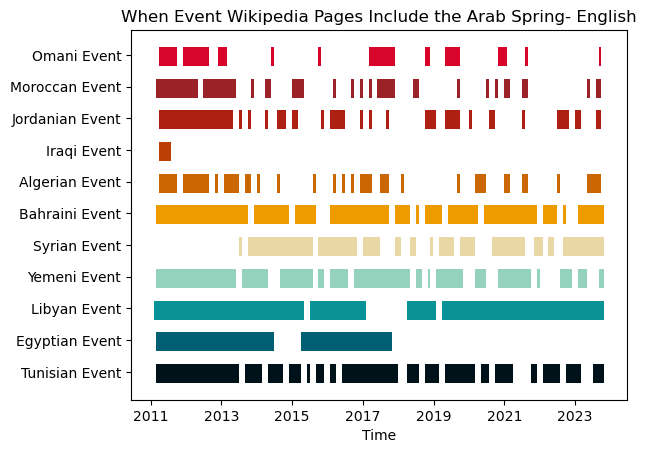

In [15]:
fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]
labelLyst = ['Tunisian Event', 'Egyptian Event', 'Libyan Event',  
             'Yemeni Event', 'Syrian Event', 'Bahraini Event', 
             'Algerian Event', 'Iraqi Event', 'Jordanian Event',
             'Moroccan Event', 'Omani Event' ]

j = 0
ystart = 0.65
width = 0.6
for country in eventsLyst:
    xrangeLyst = []
    
    #get the sub df
    df = eventDF_final.loc[eventDF_final['event'] == str(country)]

    for i in range(len(df)):
        x = df['start'][i]
        y = df['end'][i]- df['start'][i]
        xrangeLyst.append((x,y))

    ax.broken_barh(xranges = xrangeLyst, yrange=(ystart,width), facecolors = colorLyst[j])
    j = j +1
    ystart = ystart + 1
                   


ax.set_title('When Event Wikipedia Pages Include the Arab Spring')
ax.set_xlabel('Time')
# ax.legend(labels=eventsLyst, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11], labels=labelLyst)
ax.set_title('When Event Wikipedia Pages Include the Arab Spring- English')

xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])

plt.savefig("02L_eventInclusionofAS.pdf", bbox_inches='tight')

plt.show()

In [110]:
xrangeLyst

[(Timestamp('2011-02-28 00:00:00+0000', tz='UTC'),
  Timedelta('853 days 00:00:00')),
 (Timestamp('2013-08-31 00:00:00+0000', tz='UTC'),
  Timedelta('181 days 00:00:00')),
 (Timestamp('2014-04-30 00:00:00+0000', tz='UTC'),
  Timedelta('153 days 00:00:00')),
 (Timestamp('2014-11-30 00:00:00+0000', tz='UTC'),
  Timedelta('121 days 00:00:00')),
 (Timestamp('2015-05-31 00:00:00+0000', tz='UTC'),
  Timedelta('30 days 00:00:00')),
 (Timestamp('2015-08-31 00:00:00+0000', tz='UTC'),
  Timedelta('91 days 00:00:00')),
 (Timestamp('2016-01-31 00:00:00+0000', tz='UTC'),
  Timedelta('60 days 00:00:00')),
 (Timestamp('2016-05-31 00:00:00+0000', tz='UTC'),
  Timedelta('579 days 00:00:00')),
 (Timestamp('2018-03-31 00:00:00+0000', tz='UTC'),
  Timedelta('122 days 00:00:00')),
 (Timestamp('2018-09-30 00:00:00+0000', tz='UTC'),
  Timedelta('151 days 00:00:00')),
 (Timestamp('2019-04-30 00:00:00+0000', tz='UTC'),
  Timedelta('305 days 00:00:00')),
 (Timestamp('2020-04-30 00:00:00+0000', tz='UTC'),
  Time